# Landcover Classification

* **Products used:** 
[io_lulc](https://explorer.digitalearth.africa/products/io_lulc), [esa_worldcover](https://explorer.digitalearth.africa/products/esa_worldcover)

## Background

**L**and **U**se/**L**and **C**over (LULC) maps classify land into categories. They can be useful for visualising the dominant land uses in a given area. The total area or proportion of different classes can also be calculated for a specified area. This can help us for fulfilling the the Suistainable Development Goals (SDGs) from the United Nation. E.g. [goal 15, life on land](https://sdgs.un.org/goals/goal15) with the target 15.3, combat desertification, controlled by the indicator: Proportion of land that is degraded over total land area.

Many organisations publish LULC maps. Both the [The Environmental Systems Research Institute (Esri)](https://www.arcgis.com/home/item.html?id=d6642f8a4f6d4685a24ae2dc0c73d4ac) and [European Space Agency (ESA)](https://esa-worldcover.org/en) products are available on the Digital Earth Africa platform. The ESRI and ESA products are derived from ESA Sentinel imagery and available at 10 m resolution for the year of 2020 over the entire African continent.

The accuracy of landcover maps changes with  location and class, so its important to understand the quality of the maps. ESRI publishes information on the accuracy of the LULC product, which is neatly summarised in the confusion matrix located [here](https://www.arcgis.com/home/item.html?id=d6642f8a4f6d4685a24ae2dc0c73d4ac). The overall accuracy for all classes is 85 %. Keep in mind that the accuracy statistics in the link are for the globe and not specific to Africa.

ESA's WorldCover product comes with an in-depth report on the quality of the product, which we will not reproduce here. However, the full product validation report can be found using the following link: https://esa-worldcover.org/en/data-access. The overall accuracy for Africa is 73.6%.


**Important details:**

* Datacube product name: `io_lulc`
    * Classes
        * The range of integers corresponding to LULC classes is `0` - `10`.
        * `0`: `no data`
        * `1`: `water`
        * `2`: `trees`
        * `3`: `grass`
        * `4`: `flooded vegetation`
        * `5`: `crops`
        * `6`: `scrub/shrub`
        * `7`: `built area`
        * `8`: `bare ground`
        * `9`: `snow/ice`
        * `10`: `clouds` - this category indicates that no land cover information is available due to persistent cloud cover.
    * Date-range: 2020
    * Spatial resolution: 10m 


* Datacube product name: `esa_worldcover`
    * Classes
        * The range of integers corresponding to LULC classes is `0` - `100`.
        * `0`: `no data`
        * `10`: `tree cover`
        * `20`: `shrubland`
        * `30`: `grassland`
        * `40`: `cropland`
        * `50`: `built up`
        * `60`: `bare/sparse vegetation`
        * `70`: `snow and ice`
        * `80`: `permanent water bodies`
        * `90`: `herbaceous wetland`
        * `95`: `mangroves`
        * `100`: `moss and lichen`
    * Date-range: 2020
    * Spatial resolution: 10m 

## Description

In this notebook we will load LULC data using `dc.load()` to return a map of land use and land cover classes for a specified area.

Topics covered include:
1. Inspecting the LULC product available in the datacube
2. Using the `dc.load()` function to load in LULC data
3. Plotting LULC using the `plot_lulc()` function
4. An example analysis of the area of LULC classes in a given area
5. Loading and plotting the 'cover fractions' in CGLS

***

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell.

### Load packages

In [1]:
%matplotlib inline

import datacube
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from deafrica_tools.plotting import display_map #, plot_lulc

### Connect to the datacube

In [2]:
dc = datacube.Datacube(app="LCsebastian")

### List measurements

We can inspect the data available for LULC using datacube's `list_measurements` functionality. The table below lists the products and measurements available for the two LULC datasets indexed within DE Africa's datacube. We can see that the product contains one layer named 'classification'. The datatype is integer, which corresponds to a LULC class.

In [3]:
# avisiert
product_name = ['io_lulc', 'esa_worldcover']#, 'cgls_landcover'] 

dc_measurements = dc.list_measurements()
dc_measurements.loc[product_name].drop('flags_definition', axis=1)

,,name,dtype,units,nodata,aliases
product,measurement,,,,,
io_lulc,data,data,uint8,1,0.0,[classification]
esa_worldcover,classification,classification,uint8,1,0.0,NaN


### Analysis parameters

This section defines the analysis parameters, including:

* `lat, lon, buffer`: center lat/lon and analysis window size for the area of interest
* `resolution`: the pixel resolution to use for loading the LULC dataset. The native resolution of the product is 10 metres i.e. `(-10,10)`
* `measurements`: the 'band' or measurement to load from the product, we can use the native measurement names of one of the aliases

The default location is north-west of Burkina-Faso, near the border between Mali and the Cote de Voir

In [1]:
lat, lon = 12, 0
buffer = 7.0
#convert the lat,lon,buffer into a range

lons = (lon - buffer, lon + buffer)
lats = (lat - buffer, lat + buffer)


#lons = (-5.4,-5.3)
#lats = (10.3, 10.4)

#convert the lat,lon,buffer into a range
#lons = (lon - buffer, lon + buffer)
#lats = (lat - buffer, lat + buffer)

## Load the LULC datasets

First, we'll load the `esa_worldcover` Landcover Classification

In [2]:
#create reusable datacube query object
query = {
    'x': lons,
    'y': lats,
    'resolution':(-100, 100), # reducing resolution for saving memory space
    'output_crs': 'epsg:6933', # see epsg.io/6933 for more information
    #'measurements':'classification' # 
}

#load the data
ds_esa = dc.load(product='esa_worldcover', **query).squeeze()

print(ds_esa)

NameError: name 'dc' is not defined

In [6]:
ds_esa

<xarray.Dataset>
Dimensions:         (y: 17439, x: 13509)
Coordinates:
    time            datetime64[ns] 2020-07-01T12:00:00
  * y               (y) float64 2.381e+06 2.381e+06 ... 6.372e+05 6.37e+05
  * x               (x) float64 -6.754e+05 -6.754e+05 ... 6.752e+05 6.754e+05
    spatial_ref     int32 6933
Data variables:
    classification  (y, x) uint8 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
Attributes:
    crs:           epsg:6933
    grid_mapping:  spatial_ref

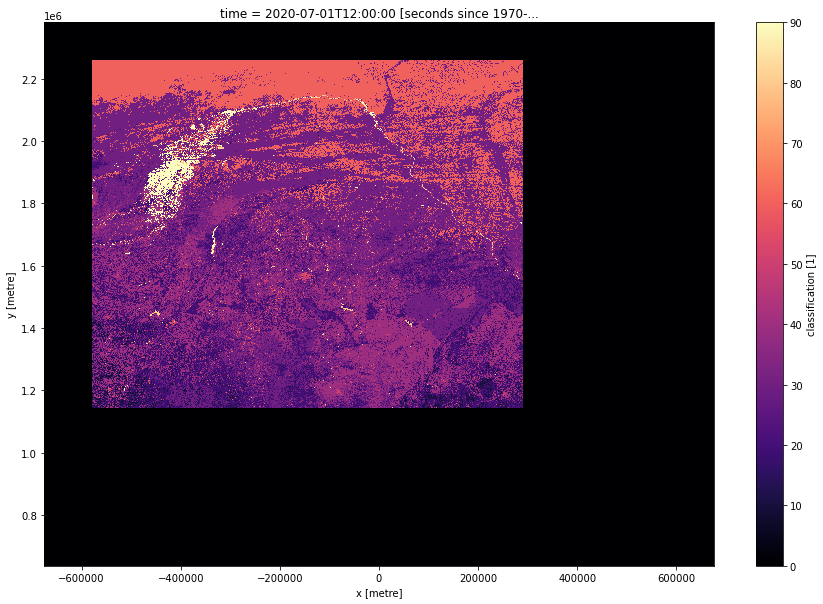

In [7]:
ds_esa.classification.plot.imshow(size=10, cmap='magma')

Now we can load the `io_lulc` ESRI products over the same region

In [8]:
# esri
ds_esri = dc.load(product='io_lulc', **query).squeeze()

print(ds_esri)

/opt/conda/lib/python3.9/site-packages/datacube/utils/geometry/_base.py:608: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return type(geom)([segmentize_shapely(g) for g in geom])


<xarray.Dataset>
Dimensions:      (y: 17439, x: 13509)
Coordinates:
    time         datetime64[ns] 2020-07-02
  * y            (y) float64 2.381e+06 2.381e+06 ... 6.372e+05 6.37e+05
  * x            (x) float64 -6.754e+05 -6.754e+05 ... 6.752e+05 6.754e+05
    spatial_ref  int32 6933
Data variables:
    data         (y, x) uint8 8 8 8 8 8 8 8 8 8 8 8 8 ... 0 0 0 0 0 0 0 0 0 0 0
Attributes:
    crs:           epsg:6933
    grid_mapping:  spatial_ref


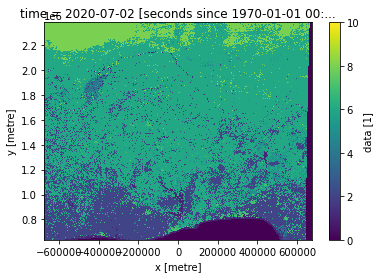

In [29]:
ds_esri.data.plot()

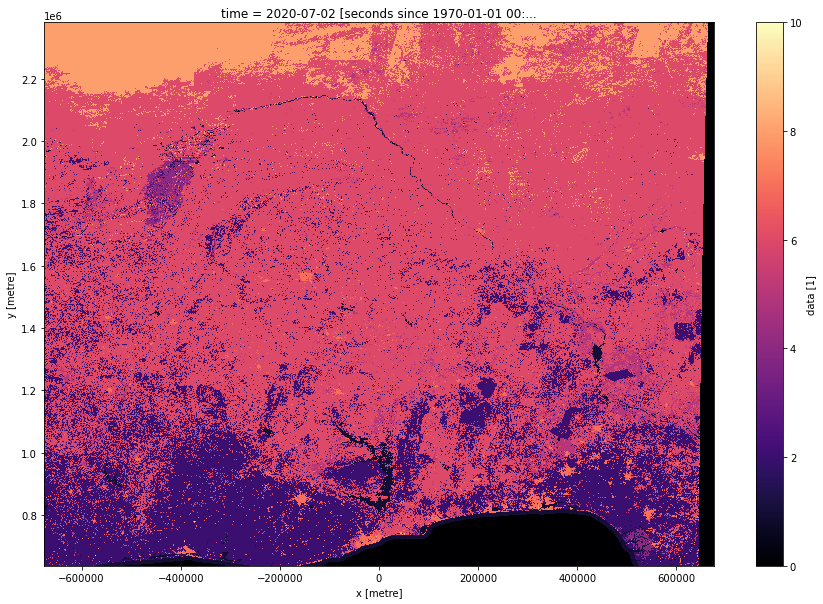

In [10]:
ds_esri.data.plot.imshow(size=10, cmap='magma')

## Plotting data

We can plot LULC for Madagascar and add a legend which corresponds to the classes using the DE Africa wrapper function `plot_lulc`. We can see that trees dominate the eastern areas of the island, while scrub/shrub is more prevalent on the western side. We can also identify a few cities/towns with the red 'built area' class.  You may also notice that the different datasets don't always agree.

In [129]:
"""
Functions for plotting Digital Earth Africa data.
"""

# Import required packages
import math
import folium
import ipywidgets
import branca
import numpy as np
import geopandas as gpd
import matplotlib as mpl
import matplotlib.patheffects as PathEffects
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from datetime import datetime
import matplotlib.cm as cm
from matplotlib import colors as mcolours
from pyproj import Proj, transform
from IPython.display import display
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
from ipyleaflet import Map, Marker, Popup, GeoJSON, basemaps, Choropleth
from skimage import exposure
from branca.colormap import linear
from odc.ui import image_aspect

from matplotlib.animation import FuncAnimation
import pandas as pd
from pathlib import Path
from shapely.geometry import box
from skimage.exposure import rescale_intensity
from tqdm.auto import tqdm
import warnings


def rgb(
    ds,
    bands=["red", "green", "blue"],
    index=None,
    index_dim="time",
    robust=True,
    percentile_stretch=None,
    col_wrap=4,
    size=6,
    aspect=None,
    savefig_path=None,
    savefig_kwargs={},
    **kwargs,
):

    """
    Takes an xarray dataset and plots RGB images using three imagery
    bands (e.g ['red', 'green', 'blue']). The `index`
    parameter allows easily selecting individual or multiple images for
    RGB plotting. Images can be saved to file by specifying an output
    path using `savefig_path`.
    This function was designed to work as an easier-to-use wrapper
    around xarray's `.plot.imshow()` functionality.
    Last modified: April 2021
    Parameters
    ----------
    ds : xarray Dataset
        A two-dimensional or multi-dimensional array to plot as an RGB
        image. If the array has more than two dimensions (e.g. multiple
        observations along a 'time' dimension), either use `index` to
        select one (`index=0`) or multiple observations
        (`index=[0, 1]`), or create a custom faceted plot using e.g.
        `col="time"`.
    bands : list of strings, optional
        A list of three strings giving the band names to plot. Defaults
        to '['red', 'green', 'blue']'. If the dataset does not contain
        bands named `'red', 'green', 'blue'`, then `bands` must be
        specified.
    index : integer or list of integers, optional
        `index` can be used to select one (`index=0`) or multiple
        observations (`index=[0, 1]`) from the input dataset for
        plotting. If multiple images are requested these will be plotted
        as a faceted plot.
    index_dim : string, optional
        The dimension along which observations should be plotted if
        multiple observations are requested using `index`. Defaults to
        `time`.
    robust : bool, optional
        Produces an enhanced image where the colormap range is computed
        with 2nd and 98th percentiles instead of the extreme values.
        Defaults to True.
    percentile_stretch : tuple of floats
        An tuple of two floats (between 0.00 and 1.00) that can be used
        to clip the colormap range to manually specified percentiles to
        get more control over the brightness and contrast of the image.
        The default is None; '(0.02, 0.98)' is equivelent to
        `robust=True`. If this parameter is used, `robust` will have no
        effect.
    col_wrap : integer, optional
        The number of columns allowed in faceted plots. Defaults to 4.
    size : integer, optional
        The height (in inches) of each plot. Defaults to 6.
    aspect : integer, optional
        Aspect ratio of each facet in the plot, so that aspect * size
        gives width of each facet in inches. Defaults to None, which
        will calculate the aspect based on the x and y dimensions of
        the input data.
    savefig_path : string, optional
        Path to export image file for the RGB plot. Defaults to None,
        which does not export an image file.
    savefig_kwargs : dict, optional
        A dict of keyword arguments to pass to
        `matplotlib.pyplot.savefig` when exporting an image file. For
        all available options, see:
        https://matplotlib.org/api/_as_gen/matplotlib.pyplot.savefig.html
    **kwargs : optional
        Additional keyword arguments to pass to `xarray.plot.imshow()`.
        For example, the function can be used to plot into an existing
        matplotlib axes object by passing an `ax` keyword argument.
        For more options, see:
        http://xarray.pydata.org/en/stable/generated/xarray.plot.imshow.html
    Returns
    -------
    An RGB plot of one or multiple observations, and optionally an image
    file written to file.
    """

    # If bands are not in the dataset
    ds_vars = list(ds.data_vars)
    if set(bands).issubset(ds_vars) == False:
        raise ValueError(
            "rgb() bands do not match band names in dataset. "
            "Note the default rgb() bands are ['red', 'green', 'blue']."
        )

    # If ax is supplied via kwargs, ignore aspect and size
    if "ax" in kwargs:

        # Create empty aspect size kwarg that will be passed to imshow
        aspect_size_kwarg = {}
    else:
        # Compute image aspect
        if not aspect:
            aspect = image_aspect(ds)

        # Populate aspect size kwarg with aspect and size data
        aspect_size_kwarg = {"aspect": aspect, "size": size}

    # If no value is supplied for `index` (the default), plot using default
    # values and arguments passed via `**kwargs`
    if index is None:

        # Select bands and convert to DataArray
        da = ds[bands].to_array()

        # If percentile_stretch == True, clip plotting to percentile vmin, vmax
        if percentile_stretch:
            vmin, vmax = da.compute().quantile(percentile_stretch).values
            kwargs.update({"vmin": vmin, "vmax": vmax})

        # If there are more than three dimensions and the index dimension == 1,
        # squeeze this dimension out to remove it
        if (len(ds.dims) > 2) and ("col" not in kwargs) and (len(da[index_dim]) == 1):

            da = da.squeeze(dim=index_dim)

        # If there are more than three dimensions and the index dimension
        # is longer than 1, raise exception to tell user to use 'col'/`index`
        elif (len(ds.dims) > 2) and ("col" not in kwargs) and (len(da[index_dim]) > 1):

            raise Exception(
                f"The input dataset `ds` has more than two dimensions: "
                "{list(ds.dims.keys())}. Please select a single observation "
                "using e.g. `index=0`, or enable faceted plotting by adding "
                'the arguments e.g. `col="time", col_wrap=4` to the function '
                "call"
            )
        da = da.compute()
        img = da.plot.imshow(
            robust=robust, col_wrap=col_wrap, **aspect_size_kwarg, **kwargs
        )

    # If values provided for `index`, extract corresponding observations and
    # plot as either single image or facet plot
    else:

        # If a float is supplied instead of an integer index, raise exception
        if isinstance(index, float):
            raise Exception(
                f"Please supply `index` as either an integer or a list of " "integers"
            )

        # If col argument is supplied as well as `index`, raise exception
        if "col" in kwargs:
            raise Exception(
                f"Cannot supply both `index` and `col`; please remove one and "
                "try again"
            )

        # Convert index to generic type list so that number of indices supplied
        # can be computed
        index = index if isinstance(index, list) else [index]

        # Select bands and observations and convert to DataArray
        da = ds[bands].isel(**{index_dim: index}).to_array().compute()

        # If percentile_stretch == True, clip plotting to percentile vmin, vmax
        if percentile_stretch:
            vmin, vmax = da.compute().quantile(percentile_stretch).values
            kwargs.update({"vmin": vmin, "vmax": vmax})

        # If multiple index values are supplied, plot as a faceted plot
        if len(index) > 1:

            img = da.plot.imshow(
                robust=robust,
                col=index_dim,
                col_wrap=col_wrap,
                **aspect_size_kwarg,
                **kwargs,
            )

        # If only one index is supplied, squeeze out index_dim and plot as a
        # single panel
        else:

            img = da.squeeze(dim=index_dim).plot.imshow(
                robust=robust, **aspect_size_kwarg, **kwargs
            )

    # If an export path is provided, save image to file. Individual and
    # faceted plots have a different API (figure vs fig) so we get around this
    # using a try statement:
    if savefig_path:

        print(f"Exporting image to {savefig_path}")

        try:
            img.fig.savefig(savefig_path, **savefig_kwargs)
        except:
            img.figure.savefig(savefig_path, **savefig_kwargs)


def display_map(x, y, crs="EPSG:4326", margin=-0.5, zoom_bias=0):
    """
    Given a set of x and y coordinates, this function generates an
    interactive map with a bounded rectangle overlayed on Google Maps
    imagery.
    Last modified: September 2019
    Modified from function written by Otto Wagner available here:
    https://github.com/ceos-seo/data_cube_utilities/tree/master/data_cube_utilities
    Parameters
    ----------
    x : (float, float)
        A tuple of x coordinates in (min, max) format.
    y : (float, float)
        A tuple of y coordinates in (min, max) format.
    crs : string, optional
        A string giving the EPSG CRS code of the supplied coordinates.
        The default is 'EPSG:4326'.
    margin : float
        A numeric value giving the number of degrees lat-long to pad
        the edges of the rectangular overlay polygon. A larger value
        results more space between the edge of the plot and the sides
        of the polygon. Defaults to -0.5.
    zoom_bias : float or int
        A numeric value allowing you to increase or decrease the zoom
        level by one step. Defaults to 0; set to greater than 0 to zoom
        in, and less than 0 to zoom out.
    Returns
    -------
    folium.Map : A map centered on the supplied coordinate bounds. A
    rectangle is drawn on this map detailing the perimeter of the x, y
    bounds.  A zoom level is calculated such that the resulting
    viewport is the closest it can possibly get to the centered
    bounding rectangle without clipping it.
    """

    # Convert each corner coordinates to lat-lon
    all_x = (x[0], x[1], x[0], x[1])
    all_y = (y[0], y[0], y[1], y[1])
    all_longitude, all_latitude = transform(Proj(crs), Proj("EPSG:4326"), all_x, all_y)

    # Calculate zoom level based on coordinates
    lat_zoom_level = (
        _degree_to_zoom_level(min(all_latitude), max(all_latitude), margin=margin)
        + zoom_bias
    )
    lon_zoom_level = (
        _degree_to_zoom_level(min(all_longitude), max(all_longitude), margin=margin)
        + zoom_bias
    )
    zoom_level = min(lat_zoom_level, lon_zoom_level)

    # Identify centre point for plotting
    center = [np.mean(all_latitude), np.mean(all_longitude)]

    # Create map
    interactive_map = folium.Map(
        location=center,
        zoom_start=zoom_level,
        tiles="http://mt1.google.com/vt/lyrs=y&z={z}&x={x}&y={y}",
        attr="Google",
    )

    # Create bounding box coordinates to overlay on map
    line_segments = [
        (all_latitude[0], all_longitude[0]),
        (all_latitude[1], all_longitude[1]),
        (all_latitude[3], all_longitude[3]),
        (all_latitude[2], all_longitude[2]),
        (all_latitude[0], all_longitude[0]),
    ]

    # Add bounding box as an overlay
    interactive_map.add_child(
        folium.features.PolyLine(locations=line_segments, color="red", opacity=0.8)
    )

    # Add clickable lat-lon popup box
    interactive_map.add_child(folium.features.LatLngPopup())

    return interactive_map


def map_shapefile(
    gdf,
    attribute,
    continuous=False,
    cmap="viridis",
    basemap=basemaps.Esri.WorldImagery,
    default_zoom=None,
    hover_col=True,
    **style_kwargs,
):
    """
    Plots a geopandas GeoDataFrame over an interactive ipyleaflet
    basemap, with features coloured based on attribute column values.
    Optionally, can be set up to print selected data from features in
    the GeoDataFrame.
    Last modified: February 2020
    Parameters
    ----------
    gdf : geopandas.GeoDataFrame
        A GeoDataFrame containing the spatial features to be plotted
        over the basemap.
    attribute: string, required
        An required string giving the name of any column in the
        GeoDataFrame you wish to have coloured on the choropleth.
    continuous: boolean, optional
        Whether to plot data as a categorical or continuous variable.
        Defaults to remapping the attribute which is suitable for
        categorical data. For continuous data set `continuous` to True.
    cmap : string, optional
        A string giving the name of a `matplotlib.cm` colormap that will
        be used to style the features in the GeoDataFrame. Features will
        be coloured based on the selected attribute. Defaults to the
        'viridis' colormap.
    basemap : ipyleaflet.basemaps object, optional
        An optional `ipyleaflet.basemaps` object used as the basemap for
        the interactive plot. Defaults to `basemaps.Esri.WorldImagery`.
    default_zoom : int, optional
        An optional integer giving a default zoom level for the
        interactive ipyleaflet plot. Defaults to None, which infers
        the zoom level from the extent of the data.
    hover_col : boolean or str, optional
        If True (the default), the function will print  values from the
        GeoDataFrame's `attribute` column above the interactive map when
        a user hovers over the features in the map. Alternatively, a
        custom shapefile field can be specified by supplying a string
        giving the name of the field to print. Set to False to prevent
        any attributes from being printed.
    **style_kwargs :
        Optional keyword arguments to pass to the `style` paramemter of
        the `ipyleaflet.Choropleth` function. This can be used to
        control the appearance of the shapefile, for example 'stroke'
        and 'weight' (controlling line width), 'fillOpacity' (polygon
        transparency) and 'dashArray' (whether to plot lines/outlines
        with dashes). For more information:
        https://ipyleaflet.readthedocs.io/en/latest/api_reference/choropleth.html
    """

    def on_hover(event, id, properties):
        with dbg:
            text = properties.get(hover_col, "???")
            lbl.value = f"{hover_col}: {text}"

    # Verify that attribute exists in shapefile
    if attribute not in gdf.columns:
        raise ValueError(
            f"The `attribute` {attribute} does not exist "
            f"in the geopandas.GeoDataFrame. "
            f"Valid attributes include {gdf.columns.values}."
        )

    # If hover_col is True, use 'attribute' as the default hover attribute.
    # Otherwise, hover_col will use the supplied attribute field name
    if hover_col and (hover_col is True):
        hover_col = attribute

    # If a custom string if supplied to hover_col, check this exists
    elif hover_col and (type(hover_col) == str):
        if hover_col not in gdf.columns:
            raise ValueError(
                f"The `hover_col` field {hover_col} does "
                f"not exist in the geopandas.GeoDataFrame. "
                f"Valid attributes include "
                f"{gdf.columns.values}."
            )

    # Convert to WGS 84 and GeoJSON format
    gdf_wgs84 = gdf.to_crs(epsg=4326)
    data_geojson = gdf_wgs84.__geo_interface__

    # If continuous is False, remap categorical classes for visualisation
    if not continuous:

        # Zip classes data together to make a dictionary
        classes_uni = list(gdf[attribute].unique())
        classes_clean = list(range(0, len(classes_uni)))
        classes_dict = dict(zip(classes_uni, classes_clean))

        # Get values to colour by as a list
        classes = gdf[attribute].map(classes_dict).tolist()

    # If continuous is True then do not remap
    else:

        # Get values to colour by as a list
        classes = gdf[attribute].tolist()

    # Create the dictionary to colour map by
    keys = gdf.index
    id_class_dict = dict(zip(keys.astype(str), classes))

    # Get centroid to focus map on
    lon1, lat1, lon2, lat2 = gdf_wgs84.total_bounds
    lon = (lon1 + lon2) / 2
    lat = (lat1 + lat2) / 2

    if default_zoom is None:

        # Calculate default zoom from latitude of features
        default_zoom = _degree_to_zoom_level(lat1, lat2, margin=-0.5)

    # Plot map
    m = Map(
        center=(lat, lon),
        zoom=default_zoom,
        basemap=basemap,
        layout=dict(width="800px", height="600px"),
    )

    # Define default plotting parameters for the choropleth map.
    # The nested dict structure sets default values which can be
    # overwritten/customised by `choropleth_kwargs` values
    style_kwargs = dict({"fillOpacity": 0.8}, **style_kwargs)

    # Get `branca.colormap` object from matplotlib string
    cm_cmap = cm.get_cmap(cmap, 30)
    colormap = branca.colormap.LinearColormap(
        [cm_cmap(i) for i in np.linspace(0, 1, 30)]
    )

    # Create the choropleth
    choropleth = Choropleth(
        geo_data=data_geojson,
        choro_data=id_class_dict,
        colormap=colormap,
        style=style_kwargs,
    )

    # If the vector data contains line features, they will not be
    # be coloured by default. To resolve this, we need to manually copy
    # across the 'fillColor' attribute to the 'color' attribute for each
    # feature, then plot the data as a GeoJSON layer rather than the
    # choropleth layer that we use for polygon data.
    linefeatures = any(
        x in ["LineString", "MultiLineString"] for x in gdf.geometry.type.values
    )
    if linefeatures:

        # Copy colour from fill to line edge colour
        for i in keys:
            choropleth.data["features"][i]["properties"]["style"][
                "color"
            ] = choropleth.data["features"][i]["properties"]["style"]["fillColor"]

        # Add GeoJSON layer to map
        feature_layer = GeoJSON(data=choropleth.data, style=style_kwargs)
        m.add_layer(feature_layer)

    else:

        # Add Choropleth layer to map
        m.add_layer(choropleth)

    # If a column is specified by `hover_col`, print data from the
    # hovered feature above the map
    if hover_col and not linefeatures:

        # Use cholopleth object if data is polygon
        lbl = ipywidgets.Label()
        dbg = ipywidgets.Output()
        choropleth.on_hover(on_hover)
        display(lbl)

    else:

        lbl = ipywidgets.Label()
        dbg = ipywidgets.Output()
        feature_layer.on_hover(on_hover)
        display(lbl)

    # Display the map
    display(m)


def xr_animation(
    ds,
    bands=None,
    output_path="animation.mp4",
    width_pixels=500,
    interval=100,
    percentile_stretch=(0.02, 0.98),
    image_proc_funcs=None,
    show_gdf=None,
    show_date="%d %b %Y",
    show_text=None,
    show_colorbar=True,
    gdf_kwargs={},
    annotation_kwargs={},
    imshow_kwargs={},
    colorbar_kwargs={},
    limit=None,
):
    """
    Takes an `xarray` timeseries and animates the data as either a
    three-band (e.g. true or false colour) or single-band animation,
    allowing changes in the landscape to be compared across time.
    Animations can be customised to include text and date annotations
    or use specific combinations of input bands. Vector data can be
    overlaid and animated on top of imagery, and custom image
    processing functions can be applied to each frame.
    Supports .mp4 (ideal for Twitter/social media) and .gif (ideal
    for all purposes, but can have large file sizes) format files.
    Last modified: October 2020
    Parameters
    ----------
    ds : xarray.Dataset
        An xarray dataset with multiple time steps (i.e. multiple
        observations along the `time` dimension).
    bands : list of strings
        An list of either one or three band names to be plotted,
        all of which must exist in `ds`.
    output_path : str, optional
        A string giving the output location and filename of the
        resulting animation. File extensions of '.mp4' and '.gif' are
        accepted. Defaults to 'animation.mp4'.
    width_pixels : int, optional
        An integer defining the output width in pixels for the
        resulting animation. The height of the animation is set
        automatically based on the dimensions/ratio of the input
        xarray dataset. Defaults to 500 pixels wide.
    interval : int, optional
        An integer defining the milliseconds between each animation
        frame used to control the speed of the output animation. Higher
        values result in a slower animation. Defaults to 100
        milliseconds between each frame.
    percentile_stretch : tuple of floats, optional
        An optional tuple of two floats that can be used to clip one or
        three-band arrays by percentiles to produce a more vibrant,
        visually attractive image that is not affected by outliers/
        extreme values. The default is `(0.02, 0.98)` which is
        equivalent to xarray's `robust=True`. This parameter is ignored
        completely if `vmin` and `vmax` are provided as kwargs to
        `imshow_kwargs`.
    image_proc_funcs : list of funcs, optional
        An optional list containing functions that will be applied to
        each animation frame (timestep) prior to animating. This can
        include image processing functions such as increasing contrast,
        unsharp masking, saturation etc. The function should take AND
        return a `numpy.ndarray` with shape [y, x, bands]. If your
        function has parameters, you can pass in custom values using
        a lambda function:
        `image_proc_funcs=[lambda x: custom_func(x, param1=10)]`.
    show_gdf: geopandas.GeoDataFrame, optional
        Vector data (e.g. ESRI shapefiles or GeoJSON) can be optionally
        plotted over the top of imagery by supplying a
        `geopandas.GeoDataFrame` object. To customise colours used to
        plot the vector features, create a new column in the
        GeoDataFrame called 'colors' specifying the colour used to plot
        each feature: e.g. `gdf['colors'] = 'red'`.
        To plot vector features at specific moments in time during the
        animation, create new 'start_time' and/or 'end_time' columns in
        the GeoDataFrame that define the time range used to plot each
        feature. Dates can be provided in any string format that can be
        converted using the `pandas.to_datetime()`. e.g.
        `gdf['end_time'] = ['2001', '2005-01', '2009-01-01']`
    show_date : string or bool, optional
        An optional string or bool that defines how (or if) to plot
        date annotations for each animation frame. Defaults to
        '%d %b %Y'; can be customised to any format understood by
        strftime (https://strftime.org/). Set to False to remove date
        annotations completely.
    show_text : str or list of strings, optional
        An optional string or list of strings with a length equal to
        the number of timesteps in `ds`. This can be used to display a
        static text annotation (using a string), or a dynamic title
        (using a list) that displays different text for each timestep.
        By default, no text annotation will be plotted.
    show_colorbar : bool, optional
        An optional boolean indicating whether to include a colourbar
        for single-band animations. Defaults to True.
    gdf_kwargs : dict, optional
        An optional dictionary of keyword arguments to customise the
        appearance of a `geopandas.GeoDataFrame` supplied to
        `show_gdf`. Keyword arguments are passed to `GeoSeries.plot`
        (see http://geopandas.org/reference.html#geopandas.GeoSeries.plot).
        For example: `gdf_kwargs = {'linewidth': 2}`.
    annotation_kwargs : dict, optional
        An optional dict of keyword arguments for controlling the
        appearance of  text annotations. Keyword arguments are passed
        to `plt.annotate` from `matplotlib`.
        (see https://matplotlib.org/api/_as_gen/matplotlib.pyplot.annotate.html
        for options). For example,
        `annotation_kwargs={'fontsize':20, 'color':'red', 'family':'serif'}`.
    imshow_kwargs : dict, optional
        An optional dict of keyword arguments for controlling the
        appearance of arrays passed to `matplotlib`'s `plt.imshow`
        (see https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html
        for options). For example, a green colour scheme and custom
        stretch could be specified using:
        `onebandplot_kwargs={'cmap':'Greens`, 'vmin':0.2, 'vmax':0.9}`.
        (some parameters like 'cmap' will only have an effect for
        single-band animations, not three-band RGB animations).
    colorbar_kwargs : dict, optional
        An optional dict of keyword arguments used to control the
        appearance of the colourbar. Keyword arguments are passed to
        `matplotlib.pyplot.tick_params`
        (see https://matplotlib.org/api/_as_gen/matplotlib.pyplot.tick_params.html
        for options). This can be used to customise the colourbar
        ticks, e.g. changing tick label colour depending on the
        background of the animation:
        `colorbar_kwargs={'colors': 'black'}`.
    limit: int, optional
        An optional integer specifying how many animation frames to
        render (e.g. `limit=50` will render the first 50 frames). This
        can be useful for quickly testing animations without rendering
        the entire time-series.
    """

    def _start_end_times(gdf, ds):
        """
        Converts 'start_time' and 'end_time' columns in a
        `geopandas.GeoDataFrame` to datetime objects to allow vector
        features to be plotted at specific moments in time during an
        animation, and sets default values based on the first
        and last time in `ds` if this information is missing from the
        dataset.
        """

        # Make copy of gdf so we do not modify original data
        gdf = gdf.copy()

        # Get min and max times from input dataset
        minmax_times = pd.to_datetime(ds.time.isel(time=[0, -1]).values)

        # Update both `start_time` and `end_time` columns
        for time_col, time_val in zip(["start_time", "end_time"], minmax_times):

            # Add time_col if it does not exist
            if time_col not in gdf:
                gdf[time_col] = np.nan

            # Convert values to datetimes and fill gaps with relevant time value
            gdf[time_col] = pd.to_datetime(gdf[time_col], errors="ignore")
            gdf[time_col] = gdf[time_col].fillna(time_val)

        return gdf

    def _add_colorbar(fig, ax, vmin, vmax, imshow_defaults, colorbar_defaults):
        """
        Adds a new colorbar axis to the animation with custom minimum
        and maximum values and styling.
        """

        # Create new axis object for colorbar
        cax = fig.add_axes([0.02, 0.02, 0.96, 0.03])

        # Initialise color bar using plot min and max values
        img = ax.imshow(np.array([[vmin, vmax]]), **imshow_defaults)
        fig.colorbar(
            img, cax=cax, orientation="horizontal", ticks=np.linspace(vmin, vmax, 2)
        )

        # Fine-tune appearance of colorbar
        cax.xaxis.set_ticks_position("top")
        cax.tick_params(axis="x", **colorbar_defaults)
        cax.get_xticklabels()[0].set_horizontalalignment("left")
        cax.get_xticklabels()[-1].set_horizontalalignment("right")

    def _frame_annotation(times, show_date, show_text):
        """
        Creates a custom annotation for the top-right of the animation
        by converting a `xarray.DataArray` of times into strings, and
        combining this with a custom text annotation. Handles cases
        where `show_date=False/None`, `show_text=False/None`, or where
        `show_text` is a list of strings.
        """

        # Test if show_text is supplied as a list
        is_sequence = isinstance(show_text, (list, tuple, np.ndarray))

        # Raise exception if it is shorter than number of dates
        if is_sequence and (len(show_text) == 1):
            show_text, is_sequence = show_text[0], False
        elif is_sequence and (len(show_text) < len(times)):
            raise ValueError(
                f"Annotations supplied via `show_text` must have "
                f"either a length of 1, or a length >= the number "
                f"of timesteps in `ds` (n={len(times)})"
            )

        times_list = (
            times.dt.strftime(show_date).values if show_date else [None] * len(times)
        )
        text_list = show_text if is_sequence else [show_text] * len(times)
        annotation_list = [
            "\n".join([str(i) for i in (a, b) if i])
            for a, b in zip(times_list, text_list)
        ]

        return annotation_list

    def _update_frames(
        i,
        ax,
        extent,
        annotation_text,
        gdf,
        gdf_defaults,
        annotation_defaults,
        imshow_defaults,
    ):
        """
        Animation called by `matplotlib.animation.FuncAnimation` to
        animate each frame in the animation. Plots array and any text
        annotations, as well as a temporal subset of `gdf` data based
        on the times specified in 'start_time' and 'end_time' columns.
        """

        # Clear previous frame to optimise render speed and plot imagery
        ax.clear()
        ax.imshow(
            array[i, ...].clip(0.0, 1.0),
            extent=extent,
            vmin=0.0,
            vmax=1.0,
            **imshow_defaults,
        )

        # Add annotation text
        ax.annotate(annotation_text[i], **annotation_defaults)

        # Add geodataframe annotation
        if show_gdf is not None:

            # Obtain start and end times to filter geodataframe features
            time_i = ds.time.isel(time=i).values

            # Subset geodataframe using start and end dates
            gdf_subset = show_gdf.loc[
                (show_gdf.start_time <= time_i) & (show_gdf.end_time >= time_i)
            ]

            if len(gdf_subset.index) > 0:

                # Set color to geodataframe field if supplied
                if ("color" in gdf_subset) and ("color" not in gdf_kwargs):
                    gdf_defaults.update({"color": gdf_subset["color"].tolist()})

                gdf_subset.plot(ax=ax, **gdf_defaults)

        # Remove axes to show imagery only
        ax.axis("off")

        # Update progress bar
        progress_bar.update(1)

    # Test if bands have been supplied, or convert to list to allow
    # iteration if a single band is provided as a string
    if bands is None:
        raise ValueError(
            f"Please use the `bands` parameter to supply "
            f"a list of one or three bands that exist as "
            f"variables in `ds`, e.g. {list(ds.data_vars)}"
        )
    elif isinstance(bands, str):
        bands = [bands]

    # Test if bands exist in dataset
    missing_bands = [b for b in bands if b not in ds.data_vars]
    if missing_bands:
        raise ValueError(
            f"Band(s) {missing_bands} do not exist as "
            f"variables in `ds` {list(ds.data_vars)}"
        )

    # Test if time dimension exists in dataset
    if "time" not in ds.dims:
        raise ValueError(
            f"`ds` does not contain a 'time' dimension "
            f"required for generating an animation"
        )

    # Set default parameters
    outline = [PathEffects.withStroke(linewidth=2.5, foreground="black")]
    annotation_defaults = {
        "xy": (1, 1),
        "xycoords": "axes fraction",
        "xytext": (-5, -5),
        "textcoords": "offset points",
        "horizontalalignment": "right",
        "verticalalignment": "top",
        "fontsize": 20,
        "color": "white",
        "path_effects": outline,
    }
    imshow_defaults = {"cmap": "magma", "interpolation": "nearest"}
    colorbar_defaults = {"colors": "white", "labelsize": 12, "length": 0}
    gdf_defaults = {"linewidth": 1.5}

    # Update defaults with kwargs
    annotation_defaults.update(annotation_kwargs)
    imshow_defaults.update(imshow_kwargs)
    colorbar_defaults.update(colorbar_kwargs)
    gdf_defaults.update(gdf_kwargs)

    # Get info on dataset dimensions
    height, width = ds.geobox.shape
    scale = width_pixels / width
    left, bottom, right, top = ds.geobox.extent.boundingbox

    # Prepare annotations
    annotation_list = _frame_annotation(ds.time, show_date, show_text)

    # Prepare geodataframe
    if show_gdf is not None:
        show_gdf = show_gdf.to_crs(ds.geobox.crs)
        show_gdf = gpd.clip(show_gdf, mask=box(left, bottom, right, top))
        show_gdf = _start_end_times(show_gdf, ds)

    # Convert data to 4D numpy array of shape [time, y, x, bands]
    ds = ds[bands].to_array().transpose(..., "variable")[0:limit, ...]
    array = ds.astype(np.float32).values

    # Optionally apply image processing along axis 0 (e.g. to each timestep)
    bar_format = (
        "{l_bar}{bar}| {n_fmt}/{total_fmt} ({remaining_s:.1f} "
        "seconds remaining at {rate_fmt}{postfix})"
    )
    if image_proc_funcs:
        print("Applying custom image processing functions")
        for i, array_i in tqdm(
            enumerate(array),
            total=len(ds.time),
            leave=False,
            bar_format=bar_format,
            unit=" frames",
        ):
            for func in image_proc_funcs:
                array_i = func(array_i)
            array[i, ...] = array_i

    # Clip to percentiles and rescale between 0.0 and 1.0 for plotting
    vmin, vmax = np.quantile(array[np.isfinite(array)], q=percentile_stretch)

    # Replace with vmin and vmax if present in `imshow_defaults`
    if "vmin" in imshow_defaults:
        vmin = imshow_defaults.pop("vmin")
    if "vmax" in imshow_defaults:
        vmax = imshow_defaults.pop("vmax")

    # Rescale between 0 and 1
    array = rescale_intensity(array, in_range=(vmin, vmax), out_range=(0.0, 1.0))
    array = np.squeeze(array)  # remove final axis if only one band

    # Set up figure
    fig, ax = plt.subplots()
    fig.set_size_inches(width * scale / 72, height * scale / 72, forward=True)
    fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

    # Optionally add colorbar
    if show_colorbar & (len(bands) == 1):
        _add_colorbar(fig, ax, vmin, vmax, imshow_defaults, colorbar_defaults)

    # Animate
    print(f"Exporting animation to {output_path}")
    anim = FuncAnimation(
        fig=fig,
        func=_update_frames,
        fargs=(
            ax,  # axis to plot into
            [left, right, bottom, top],  # imshow extent
            annotation_list,  # list of text annotations
            show_gdf,  # geodataframe to plot over imagery
            gdf_defaults,  # any kwargs used to plot gdf
            annotation_defaults,  # kwargs for annotations
            imshow_defaults,
        ),  # kwargs for imshow
        frames=len(ds.time),
        interval=interval,
        repeat=False,
    )

    # Set up progress bar
    progress_bar = tqdm(total=len(ds.time), unit=" frames", bar_format=bar_format)

    # Export animation to file
    if Path(output_path).suffix == ".gif":
        anim.save(output_path, writer="pillow")
    else:
        anim.save(output_path, dpi=72)

    # Update progress bar to fix progress bar moving past end
    if progress_bar.n != len(ds.time):
        progress_bar.n = len(ds.time)
        progress_bar.last_print_n = len(ds.time)


def _degree_to_zoom_level(l1, l2, margin=0.0):
    """
    Helper function to set zoom level for `display_map`
    """

    degree = abs(l1 - l2) * (1 + margin)
    zoom_level_int = 0
    if degree != 0:
        zoom_level_float = math.log(360 / degree) / math.log(2)
        zoom_level_int = int(zoom_level_float)
    else:
        zoom_level_int = 18
    return zoom_level_int


def plot_wofs(wofs, legend=True, **plot_kwargs):
    """Plot a water observation bit flag image.
    Parameters
    ----------
    wofs : xr.DataArray
        A DataArray containing water observation bit flags.
    legend : bool
        Whether to plot a legend. Default True.
    plot_kwargs : dict
        Keyword arguments passed on to DataArray.plot.
    Returns
    -------
    plot
    """
    cmap = mcolours.ListedColormap(
        [
            np.array([150, 150, 110]) / 255,  # dry - 0
            np.array([0, 0, 0]) / 255,  # nodata, - 1
            np.array([119, 104, 87]) / 255,  # terrain - 16
            np.array([89, 88, 86]) / 255,  # cloud_shadow - 32
            np.array([216, 215, 214]) / 255,  # cloud - 64
            np.array([242, 220, 180]) / 255,  # cloudy terrain - 80
            np.array([79, 129, 189]) / 255,  # water - 128
            np.array([51, 82, 119]) / 255,  # shady water - 160
            np.array([186, 211, 242]) / 255,  # cloudy water - 192
        ]
    )
    bounds = [
        0,
        1,
        16,
        32,
        64,
        80,
        128,
        160,
        192,
        255,
    ]
    norm = mcolours.BoundaryNorm(np.array(bounds) - 0.1, cmap.N)
    cblabels = [
        "dry",
        "nodata",
        "terrain",
        "cloud shadow",
        "cloud",
        "cloudy terrain",
        "water",
        "shady water",
        "cloudy water",
    ]

    try:
        im = wofs.plot.imshow(cmap=cmap, norm=norm, add_colorbar=legend, **plot_kwargs)
    except AttributeError:
        im = wofs.plot(cmap=cmap, norm=norm, add_colorbar=legend, **plot_kwargs)

    if legend:
        try:
            cb = im.colorbar
        except AttributeError:
            cb = im.cbar
        ticks = cb.get_ticks()
        cb.set_ticks(ticks + np.diff(ticks, append=256) / 2)
        cb.set_ticklabels(cblabels)
    return im



def plot_lulc(lulc, product=None, legend=True, **plot_kwargs):
    """Plot a LULC image.
    Parameters
    ----------
    lulc : xr.DataArray
        A DataArray containing LULC bit flags.
    product : str
        'ESA', 'ESRI', or 'CGLS'
    legend : bool
        Whether to plot a legend. Default True.
    plot_kwargs : dict
        Keyword arguments passed on to DataArray.plot.
    Returns
    -------
    plot
    """

    if "ESRI" in product:
        try:
            cmap = mcolours.ListedColormap(
                [
                    np.array([0, 0, 0]) / 255,
                    np.array([65, 155, 223]) / 255,
                    np.array([57, 125, 73]) / 255,
                    np.array([136, 176, 83]) / 255,
                    np.array([122, 135, 198]) / 255,
                    np.array([228, 150, 53]) / 255,
                    np.array([223, 195, 90]) / 255,
                    np.array([196, 40, 27]) / 255,
                    np.array([165, 155, 143]) / 255,
                    np.array([168, 235, 255]) / 255,
                    np.array([97, 97, 97]) / 255,
                ]
            )
            bounds = range(0, 12)
            norm = mcolours.BoundaryNorm(np.array(bounds), cmap.N)
            cblabels = [
                "no data",
                "water",
                "trees",
                "grass",
                "flooded vegetation",
                "crops",
                "scrub/shrub",
                "built area",
                "bare ground",
                "snow/ice",
                "clouds"
            ]
        except:
            AttributeError

    if "ESA" in product:
        try:
            cmap = mcolours.ListedColormap(
                [
                    np.array([0, 0, 0]) / 255,
                    np.array([0, 100, 0]) / 255,
                    np.array([255, 187, 34]) / 255,
                    np.array([255, 255, 76]) / 255,
                    np.array([240, 150, 255]) / 255,
                    np.array([250, 0, 0]) / 255,
                    np.array([180, 180, 180]) / 255,
                    np.array([240, 240, 240]) / 255,
                    np.array([0, 100, 200]) / 255,
                    np.array([0, 150, 160]) / 255,
                    np.array([0, 207, 117]) / 255,
                    np.array([250, 230, 160]) / 255,
                ]
            )
            bounds = [-5, 5, 15, 25, 35, 45, 55, 65, 75, 85, 92, 98, 105]
            norm = mcolours.BoundaryNorm(np.array(bounds), cmap.N)
            cblabels = [
                "no data",
                "tree cover",
                "shrubland",
                "grassland",
                "cropland",
                "built up",
                "bare/sparse vegetation",
                "snow and ice",
                "permanent water bodies",
                "herbaceous wetland",
                "mangroves",
                "moss and lichen",
            ]
        except:
            AttributeError
            
    if "CGLS" in product:
        try:
            labels = {0: {'color': '#282828', 'flag': 'unknown'},
                      20: {'color': '#FFBB22', 'flag': 'shrubs'},
                      30: {'color': '#FFFF4C', 'flag': 'herbaceous_vegetation'},
                      40: {'color': '#F096FF', 'flag': 'cultivated_and_managed_vegetation_or_agriculture'},
                      50: {'color': '#FA0000', 'flag': 'urban_or_built_up'},
                      60: {'color': '#B4B4B4', 'flag': 'bare_or_sparse_vegetation'},
                      70: {'color': '#F0F0F0', 'flag': 'snow_and_ice'},
                      80: {'color': '#0032C8', 'flag': 'permanent_water_bodies'},
                      90: {'color': '#0096A0', 'flag': 'herbaceous_wetland'},
                      100: {'color': '#FAE6A0', 'flag': 'moss_and_lichen'},
                      111: {'color': '#58481F', 'flag': 'closed_forest_evergreen_needle_leaf'},
                      112: {'color': '#009900', 'flag': 'closed_forest_evergreen_broad_leaf'},
                      113: {'color': '#70663E', 'flag': 'closed_forest_deciduous_needle_leaf'},
                      114: {'color': '#00CC00', 'flag': 'closed_forest_deciduous_broad_leaf'},
                      115: {'color': '#4E751F', 'flag': 'closed_forest_mixed'},
                      116: {'color': '#007800', 'flag': 'closed_forest_not_matching_any_of_the_other_definitions'},
                      121: {'color': '#666000', 'flag': 'open_forest_evergreen_needle_leaf'},
                      122: {'color': '#8DB400', 'flag': 'open_forest_evergreen_broad_leaf'},
                      123: {'color': '#8D7400', 'flag': 'open_forest_deciduous_needle_leaf'},
                      124: {'color': '#A0DC00', 'flag': 'open_forest_deciduous_broad_leaf'},
                      125: {'color': '#929900', 'flag': 'open_forest_mixed'},
                      126: {'color': '#648C00', 'flag': 'open_forest_not_matching_any_of_the_other_definitions'},
                      200: {'color': '#000080', 'flag': 'oceans_seas'}}

            colors = [label['color'] for label in labels.values()]
            cmap = ListedColormap([label['color'] for label in labels.values()])
            norm = mcolours.BoundaryNorm(list(labels.keys())+[201], cmap.N+1, extend='max')
            ticks = list(np.mean((list(list(labels.keys())+[201])[i+1], val)) for i, val in enumerate(list(labels.keys())))
            cblabels=[label['flag'] for label in labels.values()]
            
        except:
            AttributeError

    try:
        im = lulc.plot.imshow(cmap=cmap, norm=norm, add_colorbar=legend, **plot_kwargs)
    except AttributeError:
        im = lulc.plot(cmap=cmap, norm=norm, add_colorbar=legend, **plot_kwargs)

    if legend:
        try:
            cb = im.colorbar
        except AttributeError:
            cb = im.cbar

        if "ESRI" in product:
            cb.set_ticks(np.arange(0.5, 11, 1))
            cb.set_ticklabels(cblabels)

        if "ESA" in product:
            cb.set_ticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 88.5, 95, 101.5])
            cb.set_ticklabels(cblabels)
            
        if "CGLS" in product:
            cb.set_ticks(ticks)
            cb.set_ticklabels(cblabels)

    return im

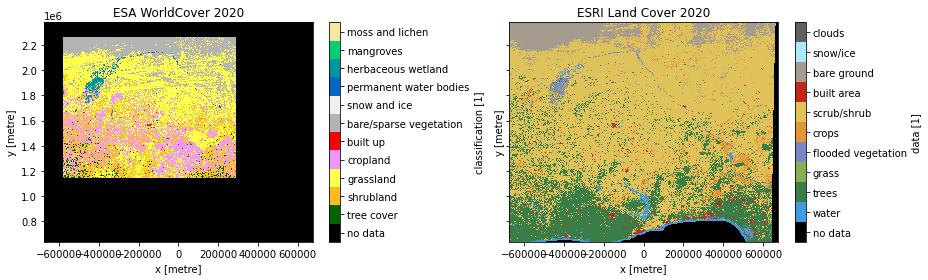

In [137]:
# avisiert
fig,ax = plt.subplots(1,2, figsize=(13,4), sharey=True)
plot_lulc(ds_esa.classification, product='ESA', legend=True, ax=ax[0])
plot_lulc(ds_esri.data, product = 'ESRI', legend=True, ax=ax[1])
ax[0].set_title('ESA WorldCover 2020')
ax[1].set_title('ESRI Land Cover 2020')
plt.tight_layout();

## Example Analysis: Investigate the area of classes

In this example, we will look more closely at the city of Antananarivo, the capital of Madagascar, which can be seen in red in the map above.  We will load both LULC datasets, calculate the area of each class in each product, and compare the area of classes between the products.  As we are looking at a smaller area, we can load the datasets at 100m resolution (its good practice to down-sample higher resoltion datasets to a coarser resolution than vice-versa). We use the 'mode' statistic to down sample the 10m datasets to 100m resolution, this means each pixel will be assigned the most-common class within the 100m metre pixel.

First, let's set up some new parameters

In [168]:
lat, lon =  10.36805, -5.3578
buffer = 0.04
resolution=(-100,100)
measuremnents='classification'

#add lat,lon,buffer to get bounding box
lon_range = (lon-buffer, lon+buffer)
lat_range =  (lat+buffer, lat-buffer)

### View selected location

In [169]:
display_map(x=lon_range, y=lat_range)

/tmp/ipykernel_550/3228205161.py:279: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  all_longitude, all_latitude = transform(Proj(crs), Proj("EPSG:4326"), all_x, all_y)


### Load LULC data for BF

In [150]:
query = {
    "time": ("2020"),
    "x": lon_range,
    "y": lat_range,
    "resolution": resolution,
    "output_crs": "epsg:6933",
    #"measurements": measurements,
}

# load the esri product
ds_esri = dc.load(product="io_lulc", resampling='mode', **query).squeeze()

# load the esa product
ds_esa = dc.load(product="esa_worldcover",resampling='mode', **query).squeeze()

### Plot the three datasets

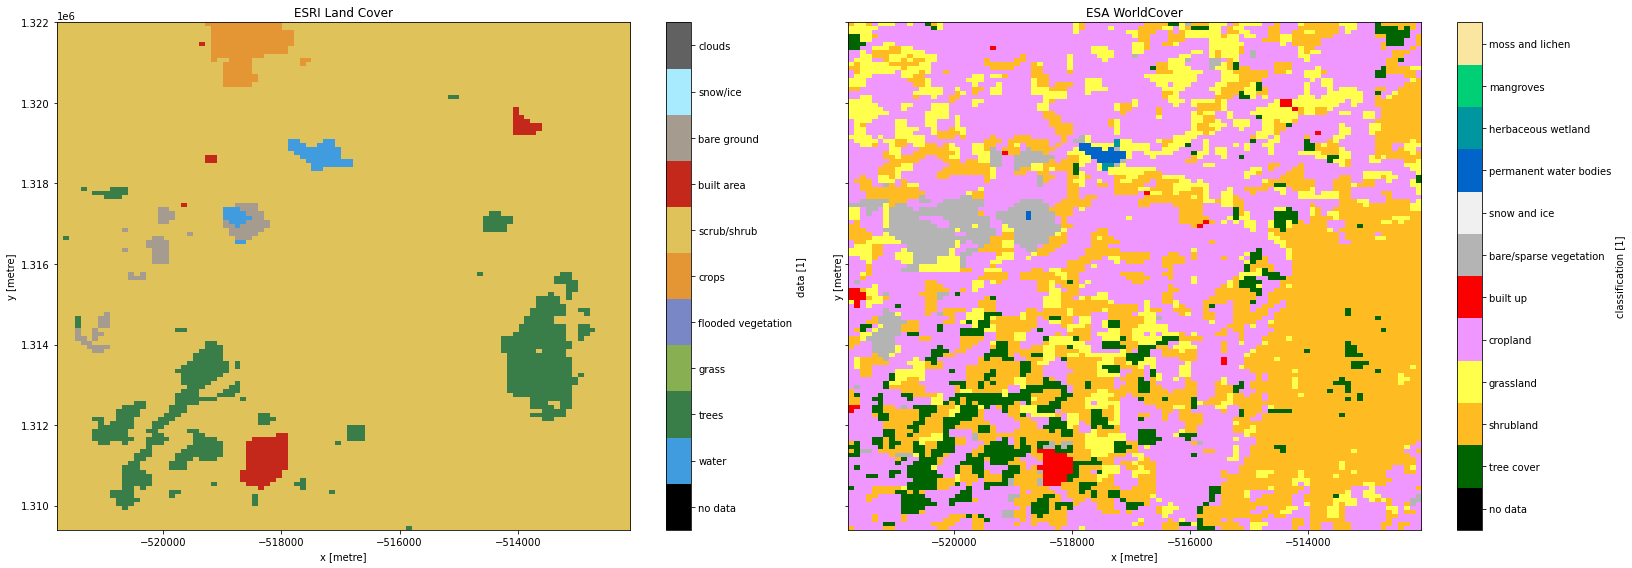

In [157]:
fig,ax = plt.subplots(1,2, figsize=(23,8), sharey=True)
plot_lulc(ds_esri.data, product='ESRI', legend=True, ax=ax[0])
plot_lulc(ds_esa.classification, product='ESA', legend=True, ax=ax[1])
ax[0].set_title('ESRI Land Cover')
ax[1].set_title('ESA WorldCover')
plt.tight_layout();

### Calculate the area of each class

We can use the numpy `np.unique` function to return the pixel count for each class.

In [ ]:
ds_esri_counts = np.unique(ds_esri.dta.data, return_counts=True)
ds_esa_counts = np.unique(ds_esa.classification.data, return_counts=True)

print(ds_esri_counts)

(array([1, 2, 5, 6, 7, 8], dtype=uint8), array([   69,   630,   156, 11157,   109,   101]))


We can see above that result is an array with classes 1, 2, 5, 6, 7 and 8, which corresponds to `water` through to `bareground`, and the count of pixels within these classes. Using the resolution we set in our data loading query, we can calculate the total area of each class in square kilometres and plot the results.

Try to add the classes to the ESAs worldcover!

In [163]:
pixel_length = query["resolution"][1]  # in metres, refers to resolution we defined above (-10,10) for Antananarivo
m_per_km = 1000  # conversion from metres to kilometres
area_per_pixel = pixel_length**2 / m_per_km**2

#calculate the area of each class
ds_esri_area = np.array(ds_esri_counts[1] * area_per_pixel)
ds_esa_area = np.array(ds_esa_counts[1] * area_per_pixel)

### Plot the area of each class

In the plot below, are the proportions of classes similar between the products? What are the classes that typically show confusion?

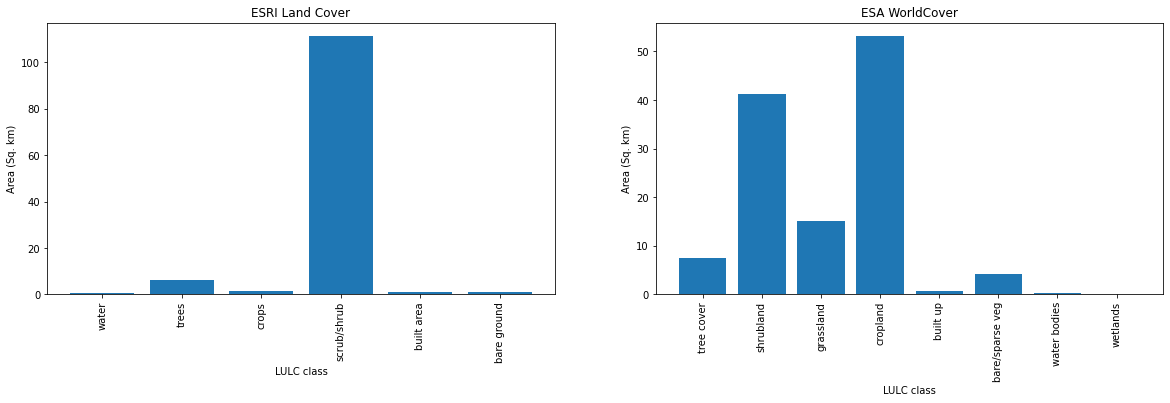

In [171]:
fig,ax=plt.subplots(1,2, figsize=(20,5))

#list of classes actually in the map
esri_classes = ['water', 'trees', 'crops', 'scrub/shrub', 'built area', 'bare ground']

esa_classes = ['tree cover', 'shrubland', 'grassland', 'cropland', 'built up',
               'bare/sparse veg', 'water bodies', 'wetlands']

#plot esri
ax[0].bar(esri_classes, ds_esri_area)
ticks_loc = ax[0].get_xticks()
ax[0].xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax[0].set_xticklabels(esri_classes, rotation=90)
ax[0].set_xlabel("LULC class")
ax[0].set_ylabel("Area (Sq. km)")

#plot worldcover
ax[1].bar(esa_classes, ds_esa_area)
ticks_1 = ax[1].get_xticks()
ax[1].xaxis.set_major_locator(mticker.FixedLocator(ticks_1))
ax[1].set_xticklabels(esa_classes, rotation=90)
ax[1].set_xlabel("LULC class")
ax[1].set_ylabel("Area (Sq. km)")

ax[0].set_title('ESRI Land Cover')
ax[1].set_title('ESA WorldCover');

## Explore CGLS cover fraction

In the above analysis we can see that the CGLS product classifies a lof of the area in our Antananarivo bounds as 'urban or built up'. Let's see how this relates to the builtup cover fraction measurement in the CGLS product. 

The cover fraction measurements in CGLS express the percentage of the pixel that is covered by a specific class of land cover, in this case urban or built-up. We can see below that the percentage cover of urban or built-up area corresponds spatially to the landcover classification.

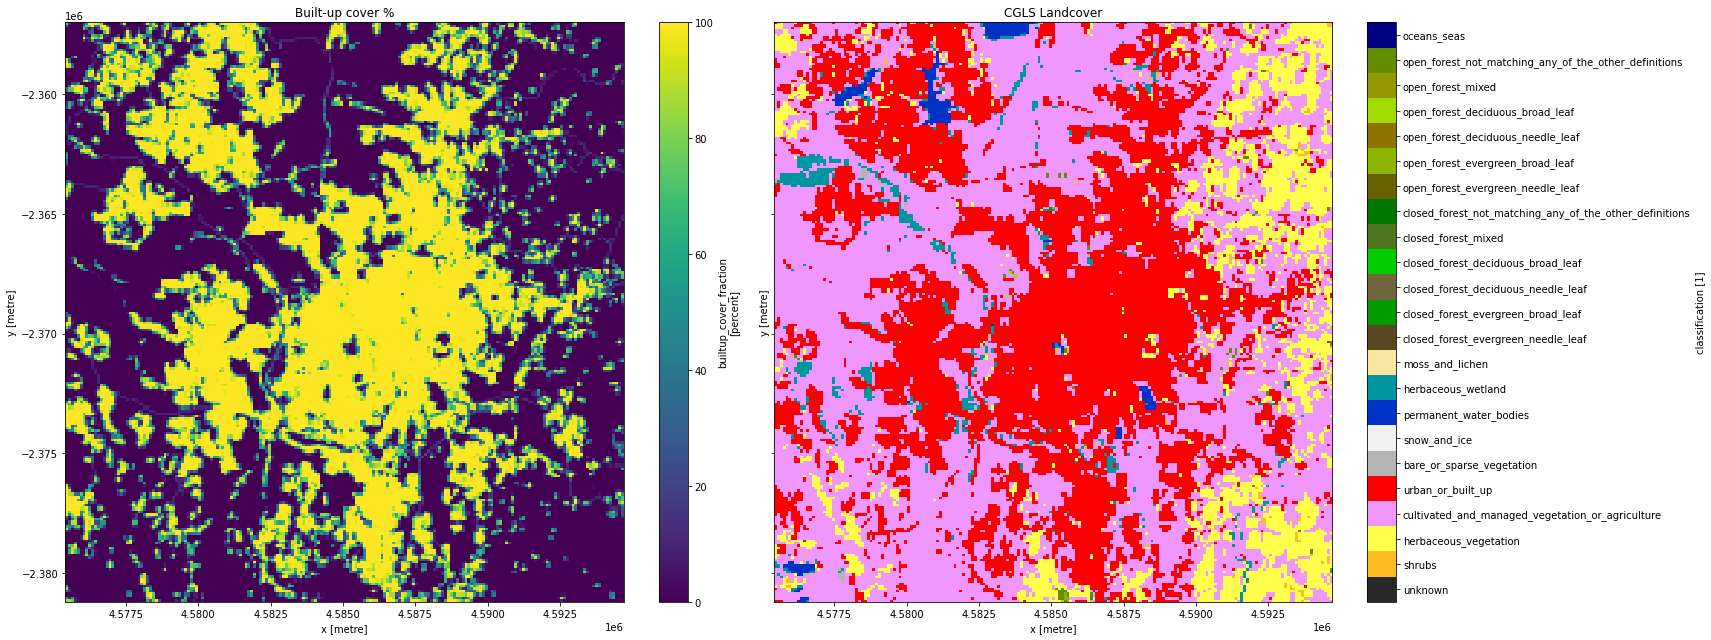

In [16]:
#load the cgls product
ds_cgls_urbancover = dc.load(product='cgls_landcover', time='2019', measurements='builtup_cover_fraction', like=ds_cgls.geobox).squeeze()

#plot the dataset
fig,ax = plt.subplots(1,2, figsize=(24,9), sharey=True)
ds_cgls_urbancover.builtup_cover_fraction.plot(ax=ax[0])
plot_lulc(ds_cgls[measurements], product='cgls', legend=True, ax=ax[1])

ax[0].set_title('Built-up cover %')
ax[1].set_title('CGLS Landcover')
plt.tight_layout();

---

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Africa data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks).

**Compatible datacube version:**

In [17]:
print(datacube.__version__)

1.8.6


**Last tested:**

In [18]:
from datetime import datetime
datetime.today().strftime('%Y-%m-%d')

'2021-12-09'